In [1]:
import numpy as np

In [2]:
##Guasain Filter

In [3]:
def gausian_kernel(size,sigma=1):
    size = int(size)//2
    x,y = np.mgrid[-size:size+1,-size:size+1]
    norm = 1/(2.0*np.pi*sigma**2)
    g = np.exp(-(x**2+y**2)/(2*sigma**2))*norm
    return g

In [4]:
##Sobel Filter

In [5]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [6]:
##Non Maximum Supression

In [7]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [8]:
##Double thresholding

In [9]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [10]:
##Hysterisis

In [11]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [12]:
import cv2
import matplotlib.pyplot as plt



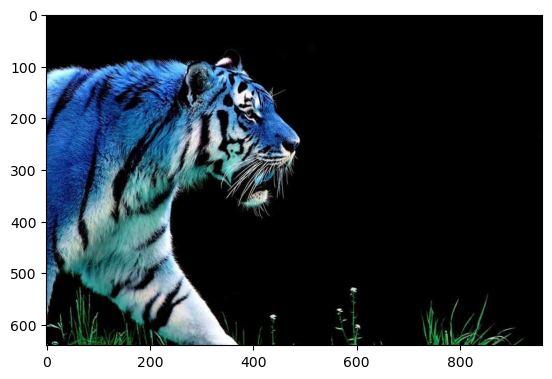

In [13]:
bgrimg = cv2.imread("input_image-1.jpg")
plt.imshow(bgrimg)


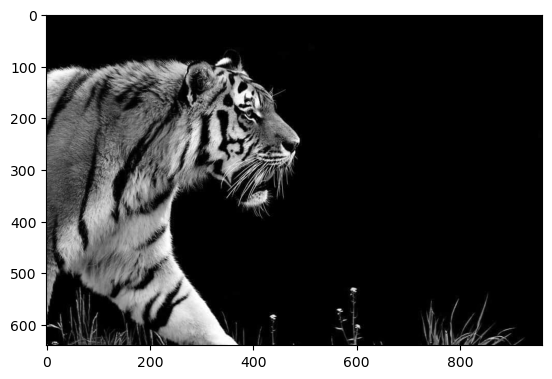

In [14]:
img = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

C:\Users\admin\AppData\Local\Temp\ipykernel_7700\1219545487.py:2: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  img_smooth = ndimage.filters.convolve(img,g_k)


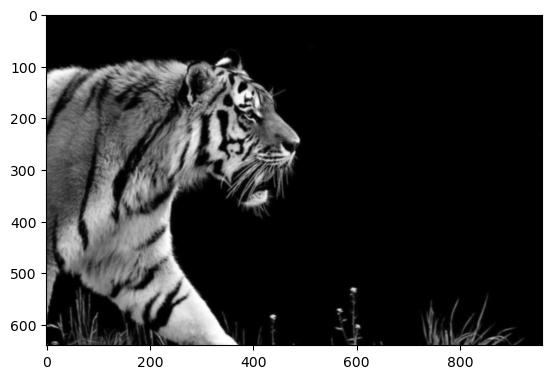

In [15]:
g_k =gausian_kernel(5)
img_smooth = ndimage.filters.convolve(img,g_k)
plt.imshow(img_smooth,cmap='gray')

C:\Users\admin\AppData\Local\Temp\ipykernel_7700\2745969487.py:7: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = ndimage.filters.convolve(img, Kx)
C:\Users\admin\AppData\Local\Temp\ipykernel_7700\2745969487.py:8: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = ndimage.filters.convolve(img, Ky)


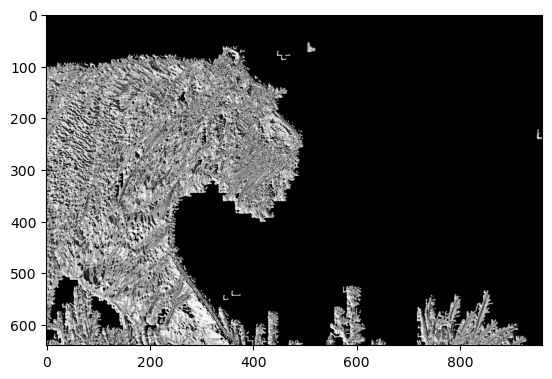

In [16]:
raw_edges , theta = sobel_filters(img_smooth)
plt.imshow(raw_edges,cmap='gray')

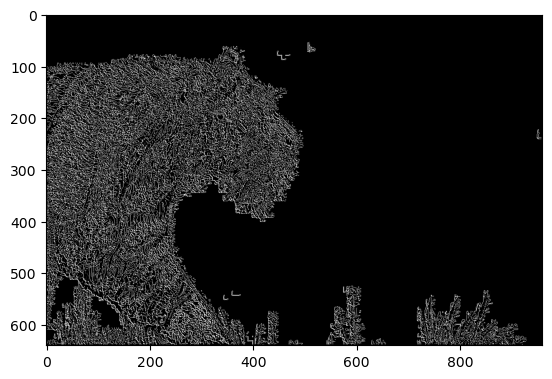

In [17]:
after_nms = non_max_suppression(raw_edges,theta)
plt.imshow(after_nms,cmap='gray')

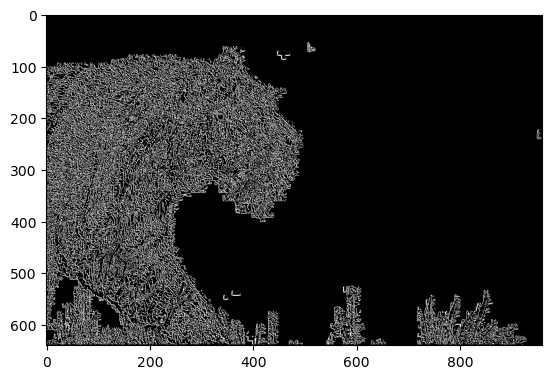

In [18]:
after_dt , week , strong = threshold(after_nms)
plt.imshow(after_dt,cmap='gray')

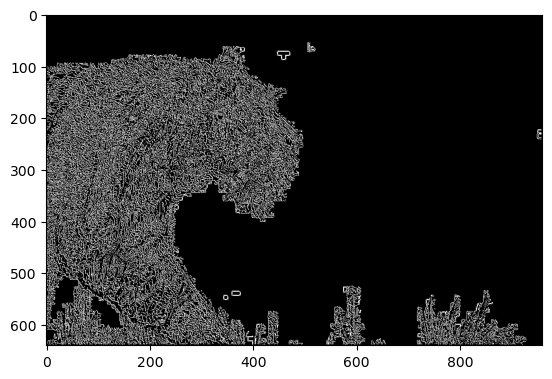

In [19]:
canny_edges =  hysteresis(after_dt,week)
plt.imshow(canny_edges,cmap='gray')